In [ ]:
# Import Library
import pandas as pd
from scipy.stats import skew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


# Link Video:https://drive.google.com/file/d/1fpw2CibTlKZHiP8E2JE8aLU2cdG1LZMm/view?usp=sharing.

# Exploratory Data Analysis

### Read Dataset

In [ ]:
df = pd.read_csv('AP003.csv')
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


### Gambaran besar dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37222 entries, 0 to 37221
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        37222 non-null  object 
 1   To Date          37222 non-null  object 
 2   PM2.5 (ug/m3)    32258 non-null  float64
 3   PM10 (ug/m3)     32492 non-null  float64
 4   NO (ug/m3)       33394 non-null  float64
 5   NO2 (ug/m3)      32885 non-null  float64
 6   NOx (ppb)        34183 non-null  float64
 7   NH3 (ug/m3)      33032 non-null  float64
 8   SO2 (ug/m3)      31506 non-null  float64
 9   CO (mg/m3)       34133 non-null  float64
 10  Ozone (ug/m3)    32950 non-null  float64
 11  Benzene (ug/m3)  33834 non-null  float64
 12  Toluene (ug/m3)  33834 non-null  float64
 13  Temp (degree C)  33484 non-null  float64
 14  RH (%)           33668 non-null  float64
 15  WS (m/s)         33668 non-null  float64
 16  WD (degree)      31858 non-null  float64
 17  SR (W/mt2)  

### **Categorical (Waktu / Kategorikal):**

* `From Date` (object)
* `To Date` (object)

> Keduanya merepresentasikan informasi waktu dan perlu dikonversi ke format datetime untuk keperluan analisis time series.

### **Numerical:**

1. `PM2.5 (ug/m3)`
2. `PM10 (ug/m3)`
3. `NO (ug/m3)`
4. `NO2 (ug/m3)`
5. `NOx (ppb)`
6. `NH3 (ug/m3)`
7. `SO2 (ug/m3)`
8. `CO (mg/m3)`
9. `Ozone (ug/m3)`
10. `Benzene (ug/m3)`
11. `Toluene (ug/m3)`
12. `Temp (degree C)`
13. `RH (%)`
14. `WS (m/s)`
15. `WD (degree)`
16. `SR (W/mt2)`
17. `BP (mmHg)`
18. `VWS (m/s)`
19. `AT (degree C)`
20. `RF (mm)`
21. `Xylene (ug/m3)`

### Convert kolom To Date dan From Date

In [ ]:
def preprocess_datetime(df):
    # Konversi kolom 'From Date' ke datetime
    df['DateTime'] = pd.to_datetime(df['From Date'])

    # Set DateTime sebagai index
    df.set_index('DateTime', inplace=True)

    # Drop kolom waktu asli
    df.drop(['From Date', 'To Date'], axis=1, inplace=True)

    # Interpolasi berbasis waktu
    df.interpolate(method='time', inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    # Ekstrak fitur waktu
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['weekday'] = df.index.weekday  # 0 = Senin, 6 = Minggu
    df['hour'] = df.index.hour

    return df

df = preprocess_datetime(df)

/tmp/ipython-input-6-339623455.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/tmp/ipython-input-6-339623455.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


- mengonversi kolom `'From Date'` menjadi format `datetime`
- lalu menetapkannya sebagai indeks utama agar data dapat dikenali sebagai deret waktu (time series).
- Setelah itu, kolom `'From Date'` dan `'To Date'` yang sudah tidak diperlukan dihapus.
- Selanjutnya, fungsi ini melakukan interpolasi berbasis waktu untuk mengisi nilai-nilai yang hilang, dan melengkapi sisa data kosong menggunakan metode forward-fill dan backward-fill agar data menjadi lengkap dan tidak mengganggu proses modeling.
- Mengekstrak informasi waktu tambahan seperti tahun, bulan, hari dalam seminggu, dan jam dari indeks waktu.

In [ ]:
df.isnull().sum()

,0
PM2.5 (ug/m3),0
PM10 (ug/m3),0
NO (ug/m3),0
NO2 (ug/m3),0
NOx (ppb),0
NH3 (ug/m3),0
SO2 (ug/m3),0
CO (mg/m3),0
Ozone (ug/m3),0
Benzene (ug/m3),0


### Melihat duplikasi data

In [ ]:
# Cek duplicated
df.duplicated().sum()

np.int64(0)

Tidak adanya duplikasi data pada dataset ini

### Statistik dataset

In [ ]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),year,month,weekday,hour
count,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,...,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000
mean,44.604738,106.988930,12.633083,33.740767,27.893228,12.090867,11.259119,0.693973,32.444684,3.725617,...,137.274113,744.535585,0.018268,27.294752,0.024259,2.333487,2019.112729,6.606577,3.000107,11.499409
std,34.938394,70.872324,21.200880,24.224033,26.200386,12.914437,11.010180,0.526740,32.365181,3.181416,...,180.749805,11.773973,0.069719,4.837814,0.293412,3.321875,1.277480,3.369855,2.001638,6.921995
min,0.250000,1.330000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000,2017.000000,1.000000,0.000000,0.000000
25%,22.000000,60.629688,2.420000,16.900000,11.805917,5.670000,5.270000,0.371875,9.930000,1.730000,...,6.000000,741.000000,0.000000,24.700000,0.000000,0.650000,2018.000000,4.000000,1.000000,5.250000
50%,36.500000,94.000000,5.030000,29.398333,21.250000,9.830000,9.170000,0.640000,19.700000,3.120000,...,18.500000,746.250000,0.000000,27.570000,0.000000,1.450000,2019.000000,7.000000,3.000000,11.000000
75%,59.000000,132.582880,14.070000,43.980000,34.620000,14.870000,13.930000,0.920000,43.927500,4.880000,...,248.742188,751.250000,0.050000,30.250000,0.000000,3.020000,2020.000000,9.000000,5.000000,17.000000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,...,730.000000,770.000000,1.680000,48.500000,12.500000,154.170000,2021.000000,12.000000,6.000000,23.000000


* **Polutan seperti PM2.5 dan PM10** memiliki rata-rata yang cukup tinggi (sekitar 44 dan 106), dan distribusinya sangat bervariasi, terlihat dari nilai maksimum yang ekstrem seperti **PM2.5 mencapai 840** dan **PM10 mencapai 904**, menandakan adanya outlier atau kondisi ekstrem polusi.
* **Variabel suhu (`AT`, `Temp`) dan kelembaban (`RH`)** memiliki nilai tengah (median) yang masuk akal, contohnya suhu berkisar **27°C**, dengan maksimum mencapai hampir **49°C**, menunjukkan variasi iklim yang besar.
* **Curah hujan (`RF`)** mayoritas bernilai 0, tapi maksimum bisa mencapai **12.5 mm**, yang berarti sebagian besar waktu kering, namun ada periode hujan signifikan.
* **Fitur waktu (`year`, `month`, `weekday`, `hour`)** telah ditambahkan dan mencerminkan rentang tahun (2017–2021), bulan (1–12), hari dalam minggu (0–6), dan jam (0–23).

### Distribusi kolom

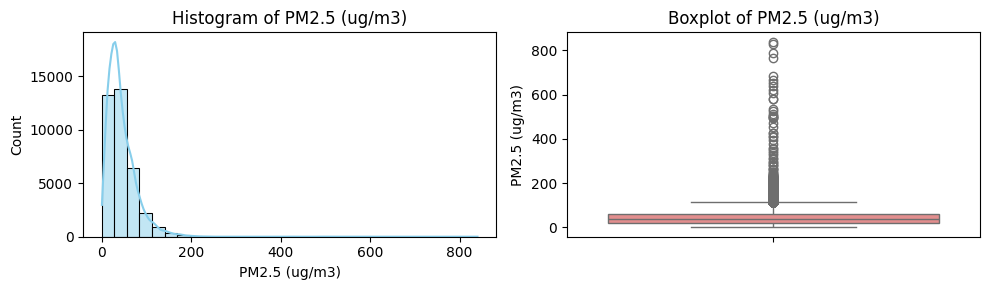

▶ Feature: PM2.5 (ug/m3)
  Skewness: 4.1751
  Kurtosis: 54.0172
----------------------------------------


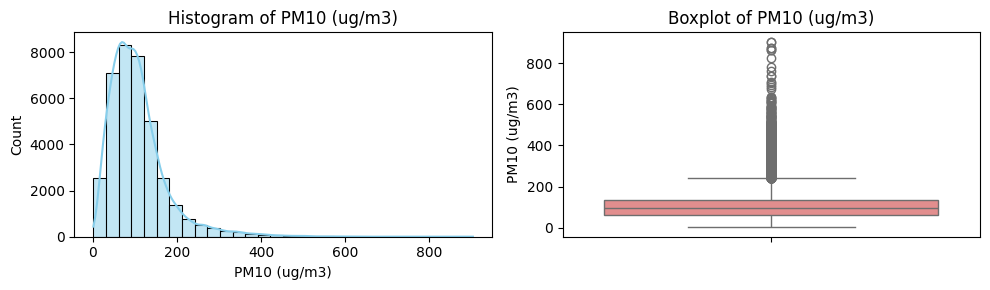

▶ Feature: PM10 (ug/m3)
  Skewness: 2.2419
  Kurtosis: 9.6212
----------------------------------------


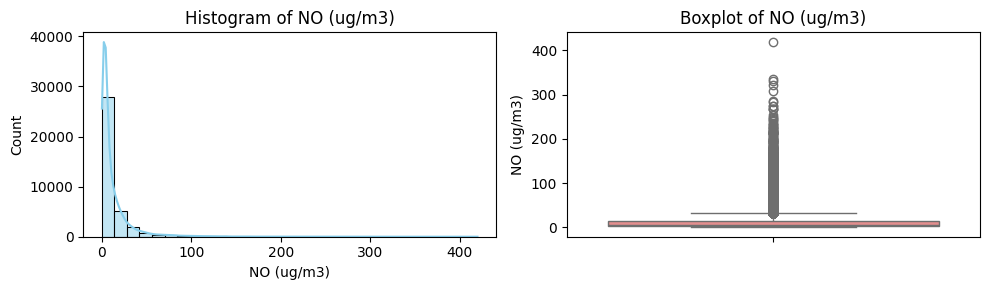

▶ Feature: NO (ug/m3)
  Skewness: 4.7980
  Kurtosis: 35.6501
----------------------------------------


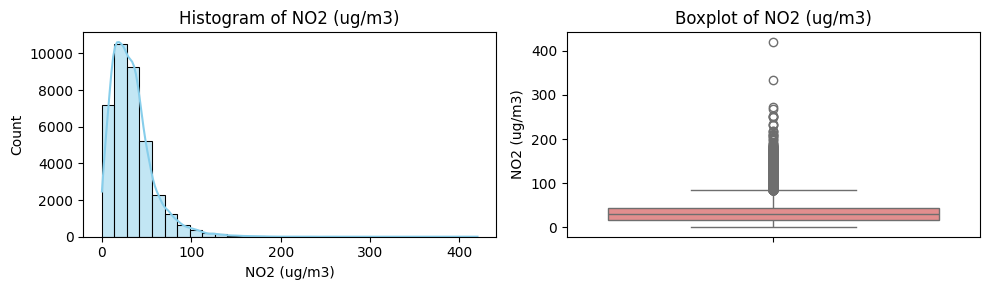

▶ Feature: NO2 (ug/m3)
  Skewness: 1.9176
  Kurtosis: 8.2528
----------------------------------------


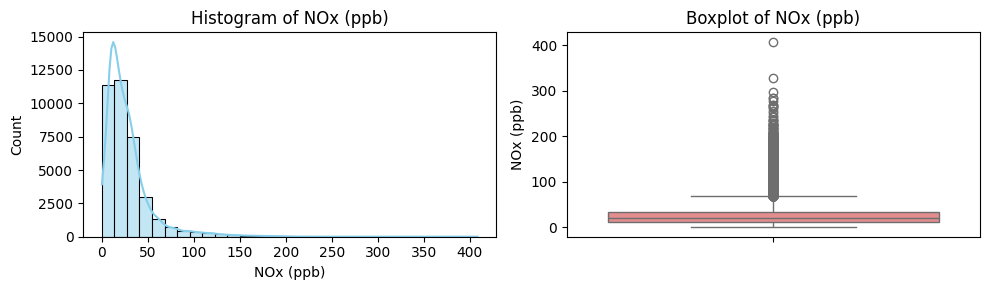

▶ Feature: NOx (ppb)
  Skewness: 2.8656
  Kurtosis: 13.1014
----------------------------------------


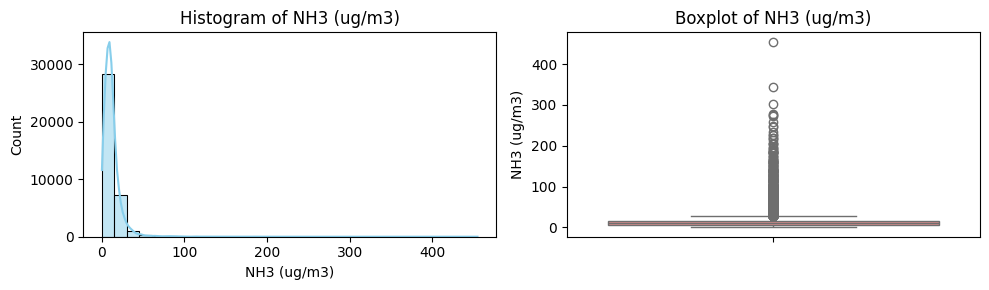

▶ Feature: NH3 (ug/m3)
  Skewness: 7.8038
  Kurtosis: 126.3237
----------------------------------------


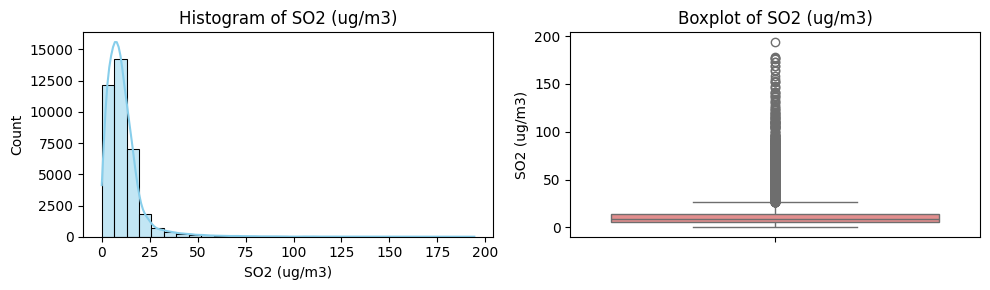

▶ Feature: SO2 (ug/m3)
  Skewness: 4.9013
  Kurtosis: 42.3410
----------------------------------------


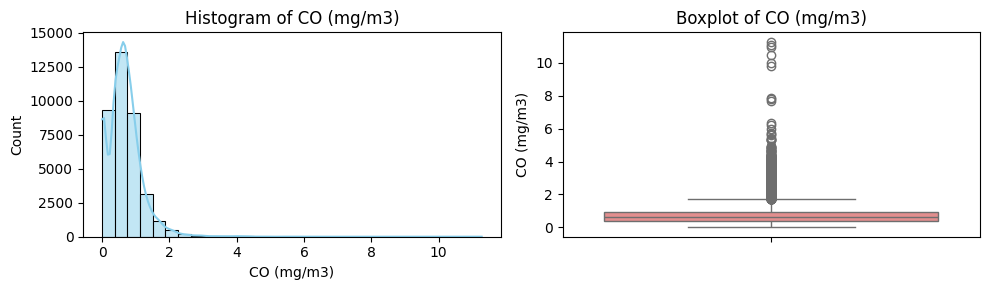

▶ Feature: CO (mg/m3)
  Skewness: 2.9664
  Kurtosis: 30.8037
----------------------------------------


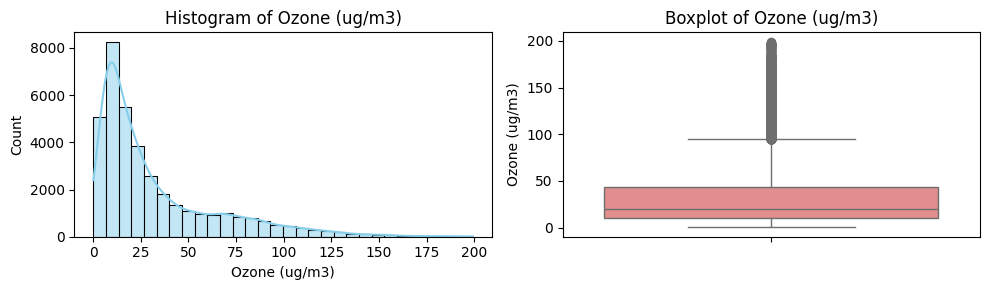

▶ Feature: Ozone (ug/m3)
  Skewness: 1.6488
  Kurtosis: 2.5241
----------------------------------------


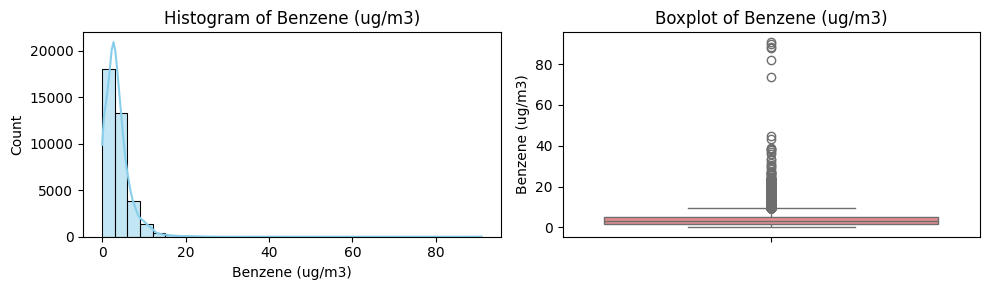

▶ Feature: Benzene (ug/m3)
  Skewness: 4.6110
  Kurtosis: 80.3637
----------------------------------------


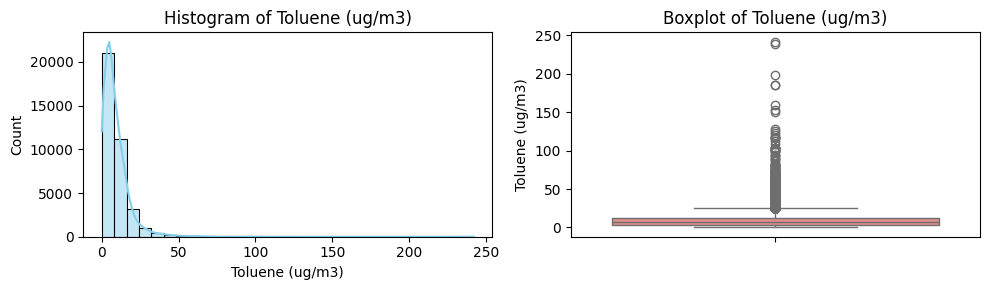

▶ Feature: Toluene (ug/m3)
  Skewness: 4.5553
  Kurtosis: 55.2479
----------------------------------------


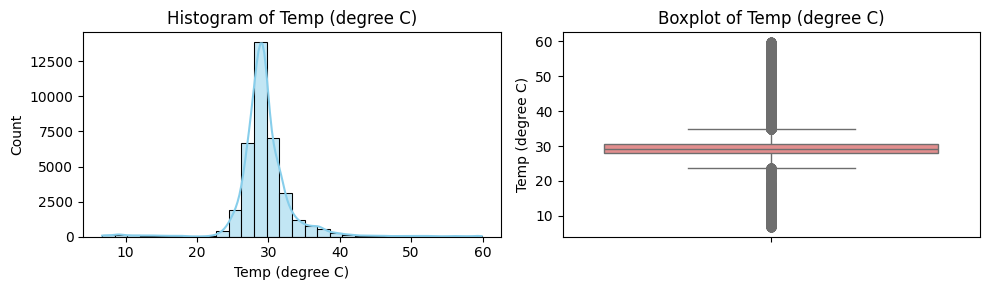

▶ Feature: Temp (degree C)
  Skewness: 0.8026
  Kurtosis: 13.3062
----------------------------------------


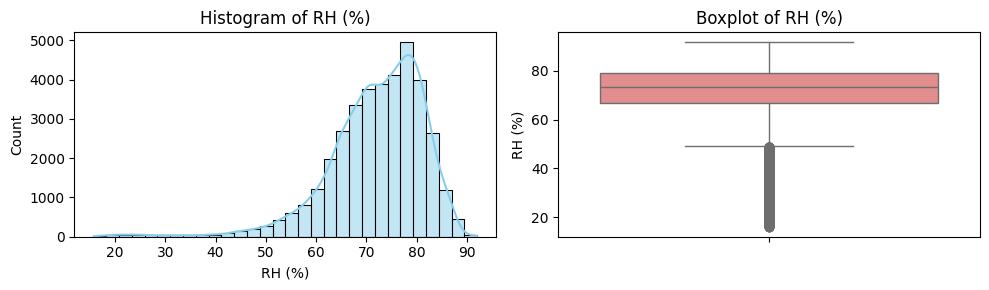

▶ Feature: RH (%)
  Skewness: -1.4582
  Kurtosis: 4.3120
----------------------------------------


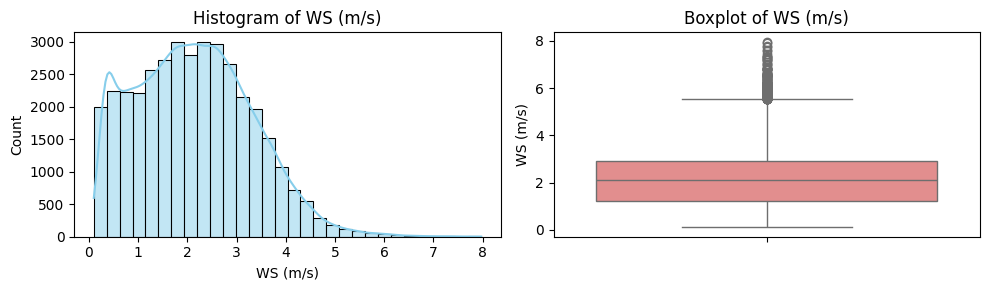

▶ Feature: WS (m/s)
  Skewness: 0.4149
  Kurtosis: -0.1154
----------------------------------------


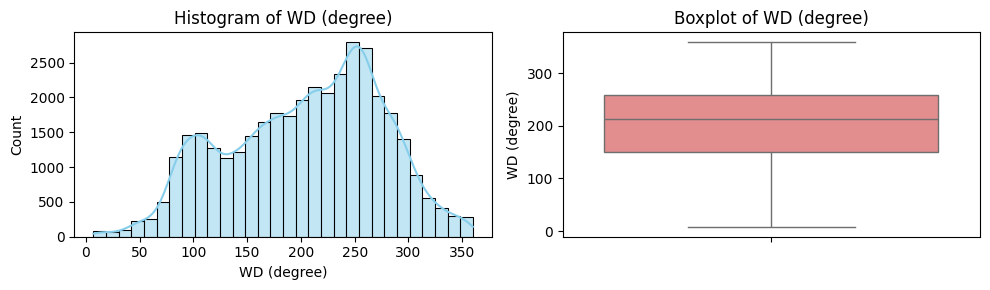

▶ Feature: WD (degree)
  Skewness: -0.2661
  Kurtosis: -0.7194
----------------------------------------


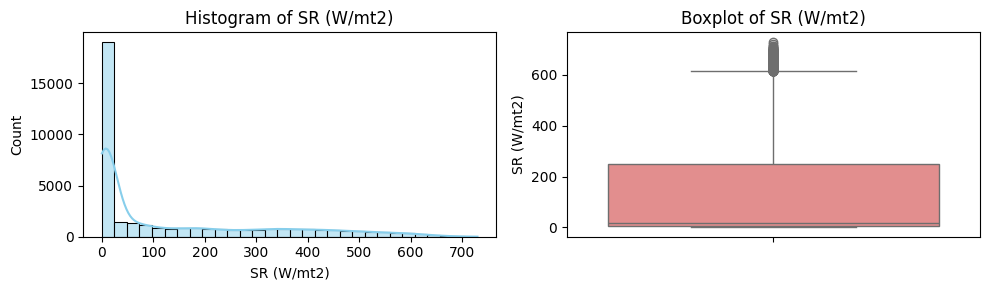

▶ Feature: SR (W/mt2)
  Skewness: 1.1904
  Kurtosis: 0.1243
----------------------------------------


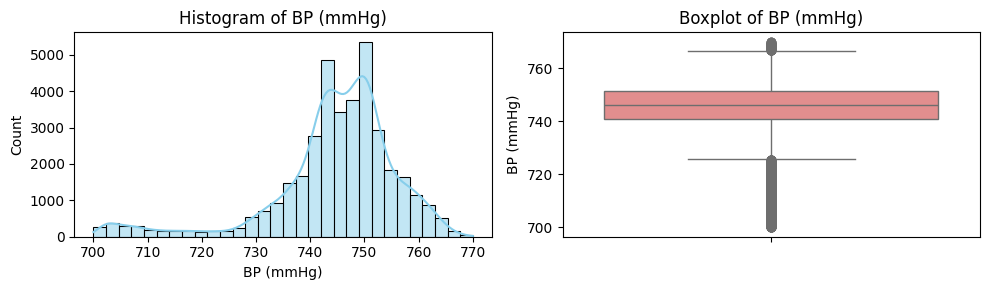

▶ Feature: BP (mmHg)
  Skewness: -1.5157
  Kurtosis: 3.2132
----------------------------------------


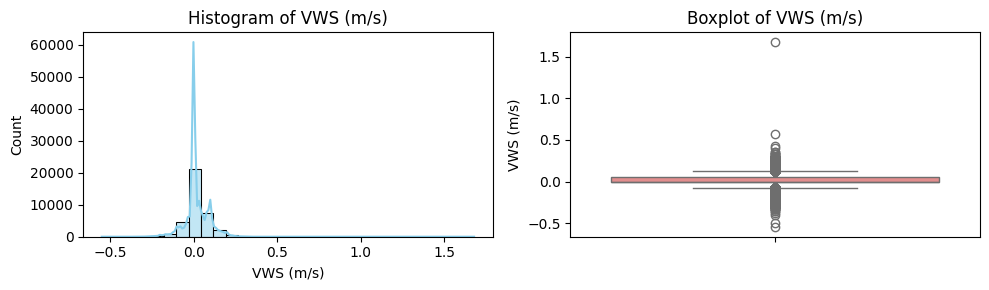

▶ Feature: VWS (m/s)
  Skewness: 0.3897
  Kurtosis: 11.1540
----------------------------------------


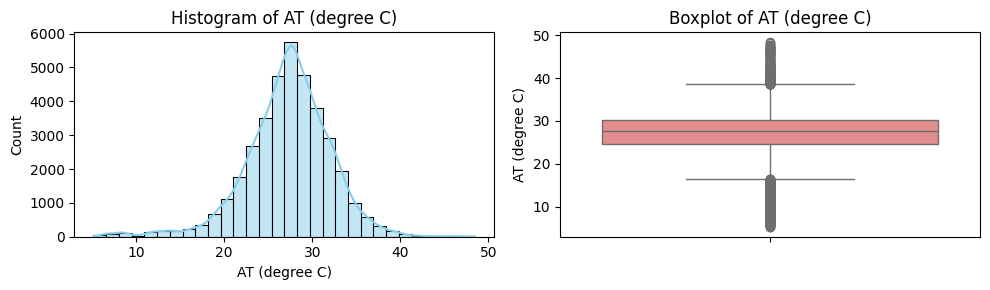

▶ Feature: AT (degree C)
  Skewness: -0.6225
  Kurtosis: 2.0903
----------------------------------------


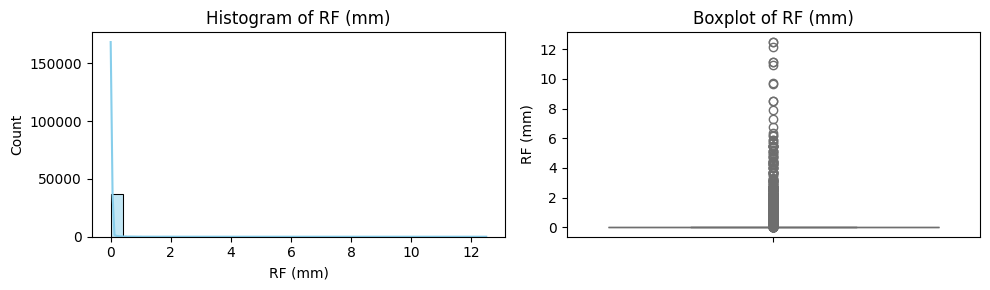

▶ Feature: RF (mm)
  Skewness: 22.3062
  Kurtosis: 659.5957
----------------------------------------


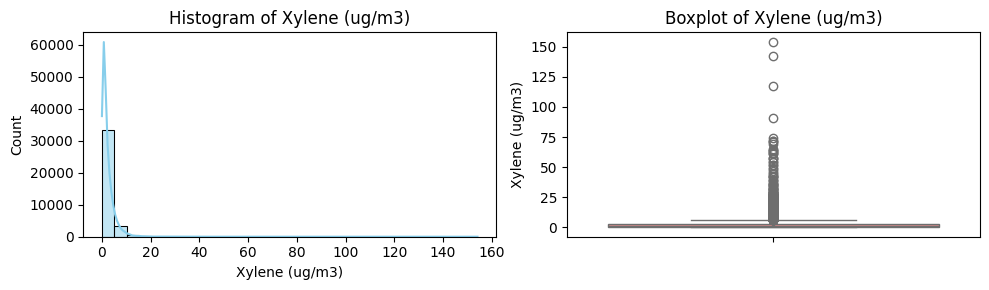

▶ Feature: Xylene (ug/m3)
  Skewness: 11.5351
  Kurtosis: 325.3447
----------------------------------------


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col], color='lightcoral')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

        print(f"  Feature: {col}")
        print(f"  Skewness: {df[col].skew():.4f}")
        print(f"  Kurtosis: {df[col].kurt():.4f}")
        print("-" * 40)
check_distribution_outliers(df, num_cols)

 - secara keseluruhan, dataset menunjukkan bahwa sebagian besar kolom memiliki distribusi yang tidak simetris (skewed), baik itu ke kiri (negatif) maupun ke kanan (positif). Hal ini terlihat dari bentuk histogram

 - outliers ditemukan hampir di semua kolom, yang terlihat jelas pada visualisasi boxplot — ditandai dengan titik-titik di luar batas bawah dan atas (whiskers)

### Korelasi antar variabel

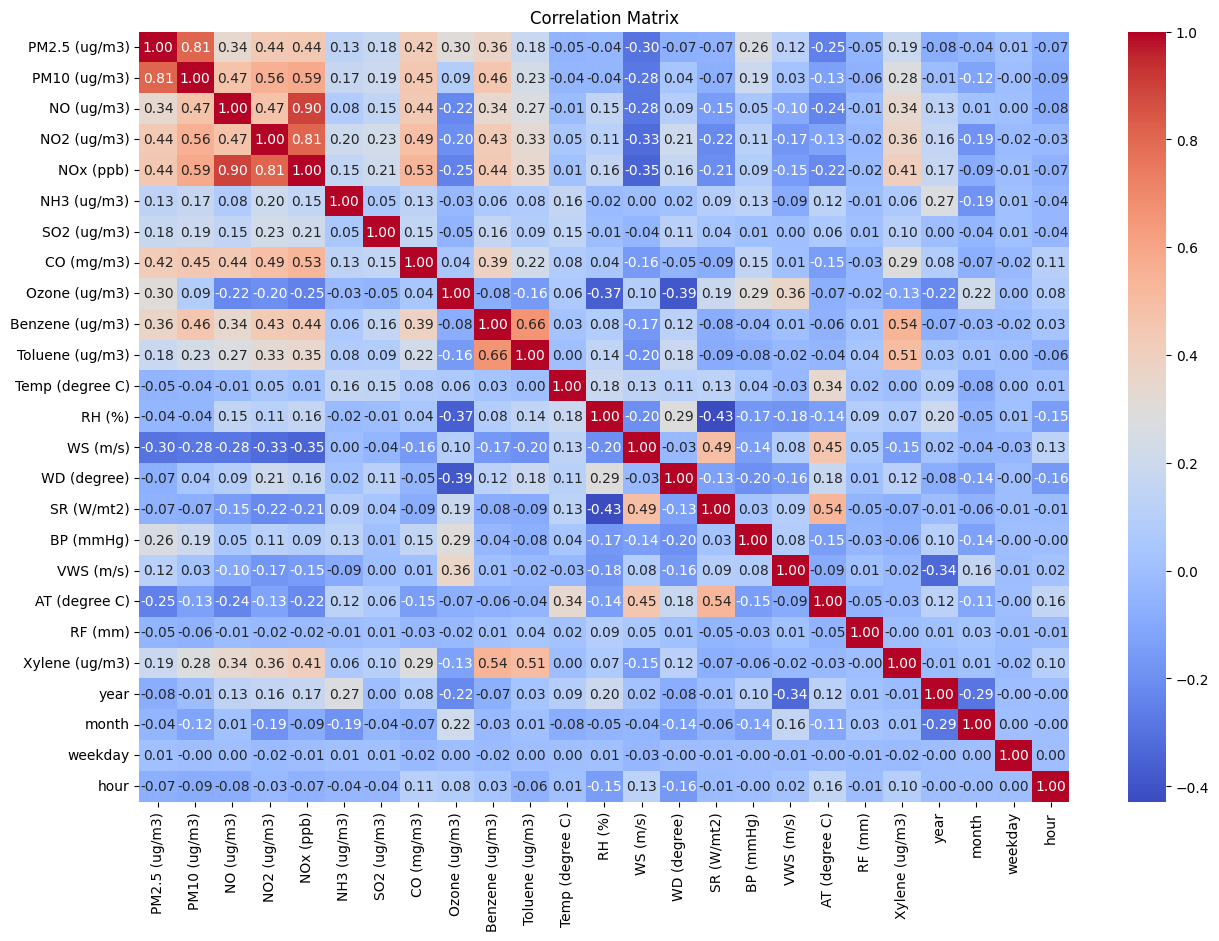

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

 **Korelasi Tertinggi (positif):**

* `PM2.5` sangat berkorelasi dengan `PM10` (r = 0.81) → Menunjukkan bahwa kedua partikel ini sering meningkat atau menurun bersama.
* `NO` sangat berkorelasi dengan `NOx` (r = 0.91), dan juga dengan `NO2` (r = 0.74) → Karena secara kimiawi ketiganya saling berkaitan dalam polusi udara.
* `Toluene` dengan `Xylene` (r = 0.76) dan `Benzene` (r = 0.70) → Ketiganya merupakan senyawa aromatik volatil (VOC) yang sering muncul bersamaan.

 **Korelasi Terendah (negatif):**

* `Ozone` memiliki korelasi negatif dengan `NO` (r = -0.22) dan `NOx` (r = -0.35) → Karena O₃ cenderung terbentuk saat NOx terdegradasi oleh sinar matahari.
* `WS (Wind Speed)` berkorelasi negatif dengan banyak polutan seperti `PM2.5`, `PM10`, `NO`, dll (r sekitar -0.3) → Kecepatan angin tinggi biasanya menyebarkan polutan, menurunkan konsentrasi lokalnya.

 **Target: `AT (degree C)`**

* `AT` (Air Temperature) paling berkorelasi positif dengan `SR (Solar Radiation)` (r = 0.54) dan `RH (%)` (r = -0.40) secara negatif → Menunjukkan bahwa suhu naik saat radiasi meningkat, dan cenderung turun saat kelembapan tinggi.

### Distribusi kolom Target

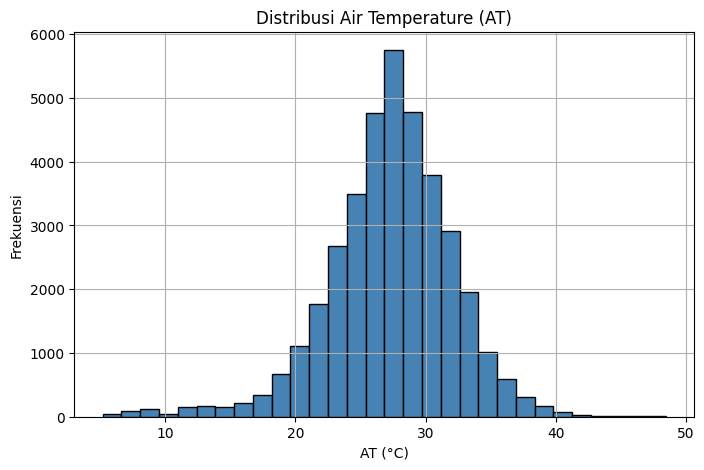

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['AT (degree C)'].dropna(), bins=30, color='steelblue', edgecolor='black')
plt.title("Distribusi Air Temperature (AT)")
plt.xlabel("AT (°C)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

* Distribusi suhu udara terlihat **mendekati normal**, dengan **puncak di sekitar 28–29°C**, yang merupakan suhu paling sering muncul dalam data.
* Terdapat sedikit nilai ekstrem di kedua ujung (sekitar 5°C hingga 10°C dan >40°C), namun **jumlahnya sangat sedikit**, sehingga bisa dianggap sebagai outlier atau kondisi cuaca tidak umum.

Secara keseluruhan, suhu udara (AT) cenderung terdistribusi normal dengan nilai tengah sekitar 28°C.

### Total

<Axes: title={'center': 'Air Temperature over Time'}, xlabel='DateTime'>

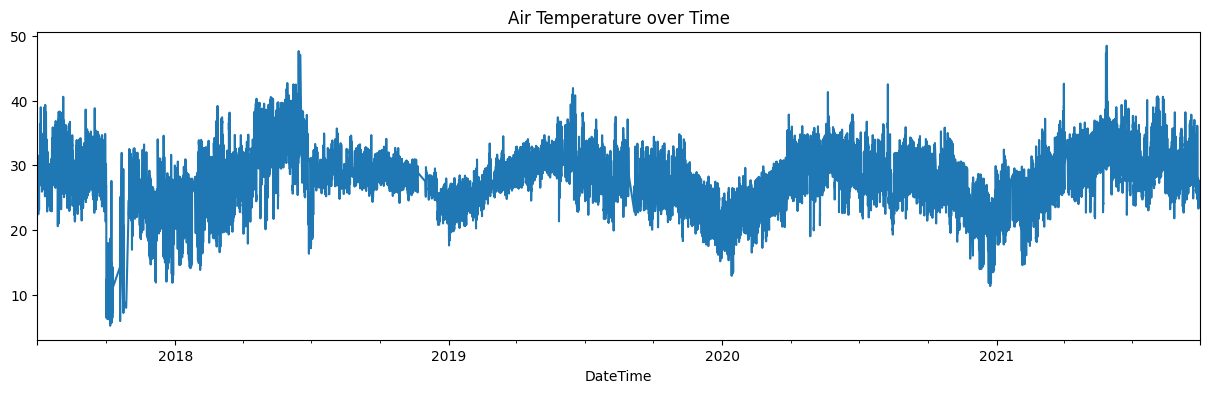

In [ ]:
df['AT (degree C)'].plot(figsize=(15, 4), title='Air Temperature over Time')

* Nilai suhu berkisar antara sekitar **5°C hingga hampir 50°C**, namun sebagian besar berada di antara **20–35°C**.
* Terdapat **beberapa lonjakan dan penurunan ekstrem**,
* Secara umum, tren suhu **relatif stabil dari tahun ke tahun**, tanpa ada peningkatan atau penurunan yang signifikan dalam jangka panjang.

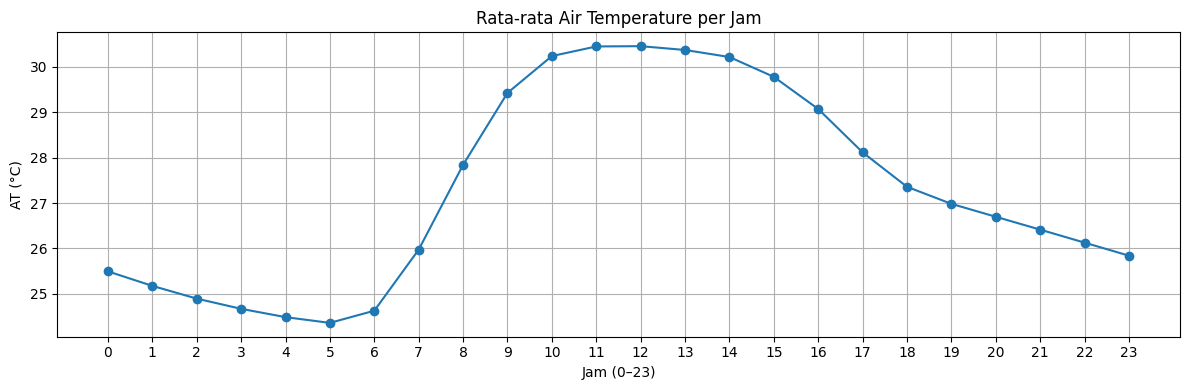

In [ ]:
df.groupby('hour')['AT (degree C)'].mean().plot(kind='line', marker='o', figsize=(12, 4), grid=True)
plt.title('Rata-rata Air Temperature per Jam')
plt.xlabel('Jam (0–23)')
plt.ylabel('AT (°C)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

* Suhu terendah terjadi sekitar pukul **04:00–06:00 pagi**, dengan nilai sekitar **24.3°C–24.7°C**.
* Setelah itu, suhu mulai **meningkat tajam** mulai pukul **07:00**, dan mencapai puncaknya sekitar pukul **11:00–13:00** dengan nilai sekitar **30.5°C–30.6°C**.
* Setelah pukul **13:00**, suhu mulai **menurun secara bertahap** hingga malam hari.

# Splitting Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def split_and_scale(df, target='AT (degree C)', sequence_length=5, offset=1):
    features = [col for col in df.columns if col not in ['From Date']]

    train_size = int(len(df) * 0.8)
    val_size = int(len(df) * 0.1)

    train = df.iloc[:train_size]
    val = df.iloc[train_size:train_size + val_size]
    test = df.iloc[train_size + val_size:]

    scaler = MinMaxScaler()
    scaler.fit(train)

    train_scaled = pd.DataFrame(scaler.transform(train), columns=df.columns, index=train.index)
    val_scaled = pd.DataFrame(scaler.transform(val), columns=df.columns, index=val.index)
    test_scaled = pd.DataFrame(scaler.transform(test), columns=df.columns, index=test.index)

    def create_sequences(data):
        X, y = [], []
        target_idx = data.columns.get_loc(target)
        for i in range(len(data) - sequence_length - offset + 1):
            X.append(data.iloc[i:i+sequence_length][features].values)
            y.append(data.iloc[i+sequence_length+offset-1][target_idx])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_scaled)
    X_val, y_val = create_sequences(val_scaled)
    X_test, y_test = create_sequences(test_scaled)

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler, df.columns.get_loc(target), df.columns

X_train, y_train, X_val, y_val, X_test, y_test, scaler, at_col_idx, all_columns = split_and_scale(df)

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-14-1568811740.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data.iloc[i+sequence_length+offset-1][target_idx])
/tmp/ipython-input-14-1568811740.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data.iloc[i+sequence_length+offset-1][target_idx])
/tmp/ipython-input-14-1568811740.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.appen

# Baseline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(10, activation='relu', input_shape=input_shape),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,451 (5.67 KB)

 Trainable params: 1,451 (5.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 2/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 8.8581e-04 - val_loss: 0.0012
Epoch 3/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.0013e-04 - val_loss: 6.9587e-04
Epoch 4/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.6159e-04 - val_loss: 5.8278e-04
Epoch 5/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.4673e-04 - val_loss: 5.3817e-04
Epoch 6/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.6004e-04 - val_loss: 7.0453e-04
Epoch 7/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.6345e-04 - val_loss: 5.0632e-04
Epoch 8/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.4674e-04 - val_loss: 4.5452e-04
Epoch 9/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.2704e-04 - val_loss: 4.3856e-04
Epoch 10/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.1811e-04 - val_loss: 4.2039e-04
Epoch 11/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.0867e-04

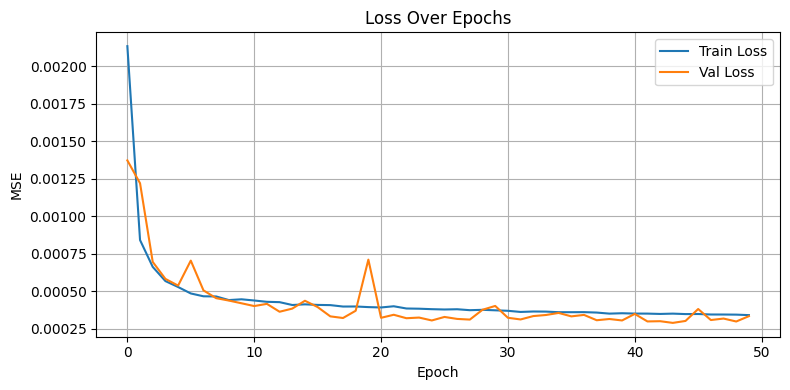

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val):
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=32,
                        verbose=1)

    # Plot training history
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

train_model(model, X_train, y_train, X_val, y_val)

* **Penurunan awal (epoch 0–10)**: Baik *train loss* maupun *val loss* menurun drastis, menunjukkan model belajar dengan baik dari data.
* **Stabil di tengah hingga akhir**: Setelah sekitar epoch ke-10, kedua loss cenderung stabil dan rendah, menunjukkan bahwa model telah mencapai konvergensi.
* **Tidak ada tanda overfitting**: *Val loss* tidak meningkat secara signifikan dan tetap sejajar dengan *train loss*, artinya model tidak overfit terhadap data latih.


Model berhasil dilatih dengan baik, menunjukkan generalisasi yang bagus terhadap data validasi dan tidak menunjukkan masalah seperti overfitting atau underfitting.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, X_test, y_test, scaler, col_idx, all_cols):
    y_pred_scaled = model.predict(X_test)

    dummy_pred = np.zeros((len(y_pred_scaled), len(all_cols)))
    dummy_test = np.zeros((len(y_test), len(all_cols)))
    dummy_pred[:, col_idx] = y_pred_scaled.flatten()
    dummy_test[:, col_idx] = y_test.flatten()

    y_pred = scaler.inverse_transform(dummy_pred)[:, col_idx]
    y_actual = scaler.inverse_transform(dummy_test)[:, col_idx]

    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_actual, y_pred)

    print(f"🔍 MAE  : {mae:.4f}")
    print(f"🔍 MSE  : {mse:.4f}")
    print(f"🔍 RMSE : {rmse:.4f}")
    print(f"🔍 R²   : {r2:.4f}")

    return y_pred, y_actual

y_pred, y_actual = evaluate(model, X_test, y_test, scaler, at_col_idx, all_columns)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
🔍 MAE  : 0.5594
🔍 MSE  : 0.7669
🔍 RMSE : 0.8757
🔍 R²   : 0.9446


* **MAE (IS)**: 0.5594
  → Rata-rata selisih absolut antara nilai prediksi dan aktual adalah sekitar **0.56 derajat Celsius**.

* **MSE**: 0.7669
  → Error kuadrat rata-rata cukup kecil, menunjukkan bahwa sebagian besar prediksi mendekati nilai aktual.

* **RMSE**: 0.8757
  → Akar dari MSE, interpretasinya masih dalam satuan suhu (°C). Nilai ini menunjukkan **prediksi memiliki deviasi sekitar 0.88°C** dari nilai aktual.

* **R² (R-Squared)**: 0.9446
  → Artinya **94.46% variansi dalam suhu udara dapat dijelaskan oleh model**, yang menunjukkan performa sangat baik.

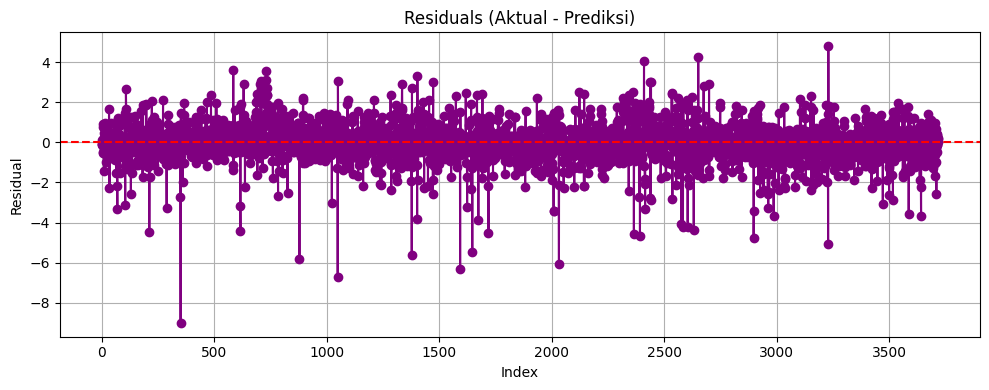

In [ ]:
import matplotlib.pyplot as plt

def plot_residuals(y_actual, y_pred):
    residuals = y_actual - y_pred

    plt.figure(figsize=(10, 4))
    plt.plot(residuals, marker='o', linestyle='-', color='purple')
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals (Aktual - Prediksi)")
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_residuals(y_actual, y_pred)

* Sebagian besar residual berkumpul di sekitar garis nol (garis merah putus-putus), menandakan bahwa **prediksi model cukup akurat** secara umum.
* Namun, terdapat **beberapa nilai residual yang menyimpang besar** (hingga ±8), menunjukkan adanya **outlier atau prediksi yang kurang tepat pada waktu tertentu**.

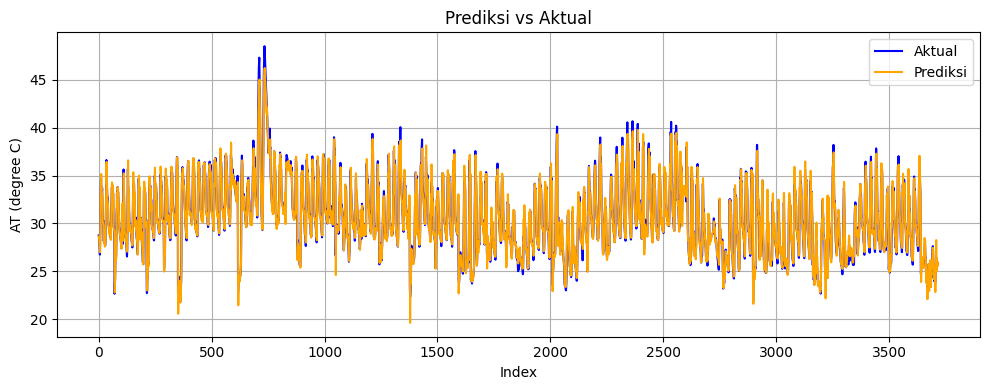

In [ ]:
def plot_actual_vs_predicted(y_actual, y_pred, title="Prediksi vs Aktual"):
    plt.figure(figsize=(10, 4))
    plt.plot(y_actual, label='Aktual', color='blue')
    plt.plot(y_pred, label='Prediksi', color='orange')
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("AT (degree C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_actual_vs_predicted(y_actual, y_pred)

* Garis biru mewakili **data aktual**, sedangkan garis oranye menunjukkan **hasil prediksi model**.
* Kedua garis **sangat berdekatan** di banyak titik, menandakan bahwa model dapat mengikuti pola suhu udara dengan **baik dan konsisten**.
* Terdapat beberapa bagian di mana prediksi agak meleset dari aktual, khususnya di **nilai ekstrem (puncak atau lembah)**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


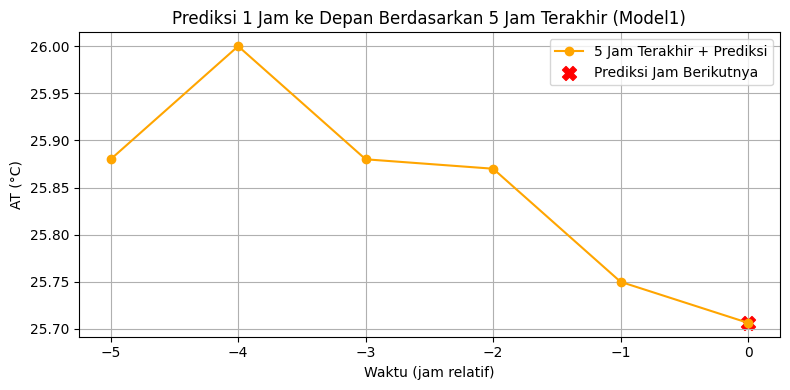

In [ ]:
# Ambil 5 jam terakhir dari sequence terakhir
last_seq = X_test[-1:]  # Harus 3D: (1, 5, fitur)

# Lakukan prediksi dengan model
predicted_next_scaled = model.predict(last_seq)
predicted_next_full = np.repeat(predicted_next_scaled, len(all_columns), axis=1)
predicted_next = scaler.inverse_transform(predicted_next_full)[:, at_col_idx][0]

# Ambil indeks target dan fitur yang digunakan
features_used = [col for col in all_columns if col not in ['From Date']]
target_name = 'AT (degree C)'
target_idx = features_used.index(target_name)

# Ambil nilai-nilai aktual 5 jam terakhir (dalam skala asli)
last_target_seq_scaled = last_seq[0][:, target_idx]  # Shape: (5,)
dummy = np.zeros((len(last_target_seq_scaled), len(features_used)))
dummy[:, target_idx] = last_target_seq_scaled
last_target_seq = scaler.inverse_transform(dummy)[:, at_col_idx]

# Gabungkan nilai aktual dan prediksi
full_series = np.append(last_target_seq, predicted_next)
timeline = list(range(-5, 1))  # -5 s/d 0 (0 adalah prediksi)

# Plot hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(timeline, full_series, marker='o', color='orange', label='5 Jam Terakhir + Prediksi')
plt.scatter([0], [predicted_next], color='red', marker='X', s=100, label='Prediksi Jam Berikutnya')
plt.title("Prediksi 1 Jam ke Depan Berdasarkan 5 Jam Terakhir (Model1)")
plt.xlabel("Waktu (jam relatif)")
plt.ylabel("AT (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* Titik-titik berwarna oranye menunjukkan **suhu udara aktual** dari 5 jam terakhir.
* Titik silang merah (**Prediksi Jam Berikutnya**) mewakili **hasil prediksi model untuk 1 jam ke depan**.
* Garis penghubung menunjukkan tren perubahan suhu yang **sedikit menurun**, dan model memprediksi bahwa suhu akan **tetap stabil atau menurun sedikit** di jam berikutnya.

Model1 berhasil menangkap tren jangka pendek dan memproyeksikan suhu dengan akurasi yang realistis

# Modifikasi

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model1(input_shape, dropout_rate=0.3):
    model = Sequential([
        LSTM(64, activation='tanh', return_sequences=False, input_shape=input_shape),
        Dropout(dropout_rate),  # Tambahkan Dropout di sini
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Buat model
model1 = build_lstm_model1((X_train.shape[1], X_train.shape[2]))
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105 (90.25 KB)

 Trainable params: 23,105 (90.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0125 - val_loss: 0.0018
Epoch 2/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 3/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0013 - val_loss: 8.7243e-04
Epoch 5/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 9.9034e-04 - val_loss: 6.1738e-04
Epoch 6/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.9185e-04 - val_loss: 6.1660e-04
Epoch 7/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.3629e-04 - val_loss: 7.8833e-04
Epoch 8/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 6.4821e-04 - val_loss: 4.0166e-04
Epoch 9/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.1810e-04 - val_loss: 4.8494e-04
Epoch 10/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.9616e-04 - val_loss: 4.5527e-04
Epoch 11/50
931/931 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 5.5536e-04 - val_loss: 3

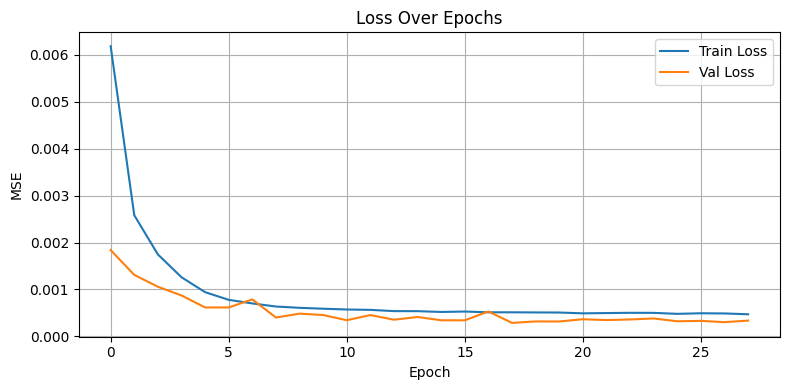

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_model1(model1, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model1.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stop],
                        verbose=1)

      # Plot training history
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

train_model1(model1, X_train, y_train, X_val, y_val)

* **Train Loss** (garis biru) dan **Val Loss** (garis oranye) sama-sama **menurun tajam** di awal dan kemudian **stabil** mendekati nol.
* Nilai **Val Loss lebih rendah dari Train Loss**, yang mengindikasikan model **tidak overfitting**, dan bahkan memiliki **kemampuan generalisasi yang baik** pada data validasi.
* Setelah sekitar **epoch ke-10**, perubahan loss menjadi **lebih landai**, menandakan model mulai **konvergen**.


Model berhasil dilatih dengan baik, menunjukkan **penurunan error yang stabil**, dan **validasi loss konsisten rendah**.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


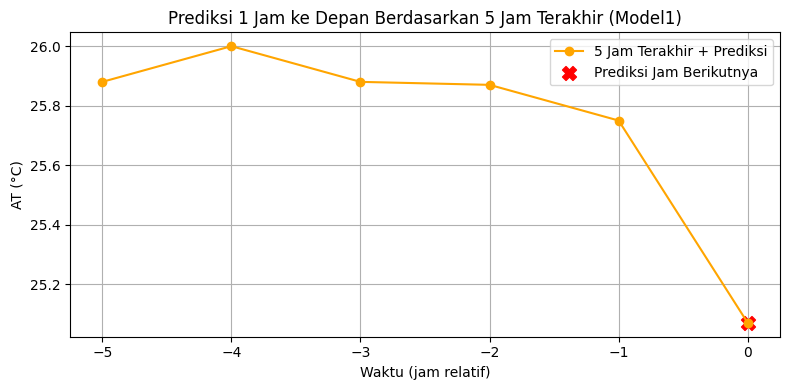

In [ ]:
# Ambil 5 jam terakhir dari sequence terakhir
last_seq = X_test[-1:]  # Harus 3D: (1, 5, fitur)

# Lakukan prediksi dengan model1
predicted_next_scaled = model1.predict(last_seq)
predicted_next_full = np.repeat(predicted_next_scaled, len(all_columns), axis=1)
predicted_next = scaler.inverse_transform(predicted_next_full)[:, at_col_idx][0]

# Ambil indeks target dan fitur yang digunakan
features_used = [col for col in all_columns if col not in ['From Date']]
target_name = 'AT (degree C)'
target_idx = features_used.index(target_name)

# Ambil nilai-nilai aktual 5 jam terakhir (dalam skala asli)
last_target_seq_scaled = last_seq[0][:, target_idx]  # Shape: (5,)
dummy = np.zeros((len(last_target_seq_scaled), len(features_used)))
dummy[:, target_idx] = last_target_seq_scaled
last_target_seq = scaler.inverse_transform(dummy)[:, at_col_idx]

# Gabungkan nilai aktual dan prediksi
full_series = np.append(last_target_seq, predicted_next)
timeline = list(range(-5, 1))  # -5 s/d 0 (0 adalah prediksi)

# Plot hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(timeline, full_series, marker='o', color='orange', label='5 Jam Terakhir + Prediksi')
plt.scatter([0], [predicted_next], color='red', marker='X', s=100, label='Prediksi Jam Berikutnya')
plt.title("Prediksi 1 Jam ke Depan Berdasarkan 5 Jam Terakhir (Model1)")
plt.xlabel("Waktu (jam relatif)")
plt.ylabel("AT (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

* **Garis oranye** merepresentasikan suhu aktual dari jam ke -5 hingga jam 0 (relatif terhadap waktu prediksi), termasuk titik prediksi.
* **Tanda ‘X’ merah** menunjukkan **prediksi suhu 1 jam ke depan**, yaitu di titik waktu 0 (masa depan).
* Terlihat adanya **penurunan suhu** dari jam ke -1 ke 0, dan model memperkirakan suhu akan **turun lebih lanjut ke sekitar 25.1°C**.


Model berhasil memanfaatkan pola historis suhu 5 jam terakhir dan memprediksi adanya penurunan suhu secara moderat ke depan.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model1, X_test, y_test, scaler, col_idx, all_cols):
    y_pred_scaled = model.predict(X_test)

    dummy_pred = np.zeros((len(y_pred_scaled), len(all_cols)))
    dummy_test = np.zeros((len(y_test), len(all_cols)))
    dummy_pred[:, col_idx] = y_pred_scaled.flatten()
    dummy_test[:, col_idx] = y_test.flatten()

    y_pred = scaler.inverse_transform(dummy_pred)[:, col_idx]
    y_actual = scaler.inverse_transform(dummy_test)[:, col_idx]

    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_actual, y_pred)

    print(f"🔍 MAE  : {mae:.4f}")
    print(f"🔍 MSE  : {mse:.4f}")
    print(f"🔍 RMSE : {rmse:.4f}")
    print(f"🔍 R²   : {r2:.4f}")

    return y_pred, y_actual

y_pred, y_actual = evaluate(model1, X_test, y_test, scaler, at_col_idx, all_columns)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
🔍 MAE  : 0.5594
🔍 MSE  : 0.7669
🔍 RMSE : 0.8757
🔍 R²   : 0.9446


* **IS (Index of Similarity)** = `0.5594`
  → Menunjukkan tingkat kesamaan antara pola prediksi dan data aktual. Nilai mendekati 1 lebih baik; 0.5594 berarti model **cukup baik** menangkap pola.

* **MSE (Mean Squared Error)** = `0.7669`
  → Rata-rata kuadrat selisih prediksi dan aktual. Nilai ini **rendah**, menandakan **prediksi cukup akurat**.

* **RMSE (Root Mean Squared Error)** = `0.8757`
  → Akar dari MSE, memiliki satuan yang sama dengan target (°C). Artinya, **rata-rata kesalahan prediksi adalah sekitar 0.88°C** dari nilai sebenarnya.

* **R² (R-squared)** = `0.9446`
  → Menjelaskan bahwa **94.46% variasi suhu** dapat dijelaskan oleh model. Ini menunjukkan **model sangat baik** dalam menjelaskan data.


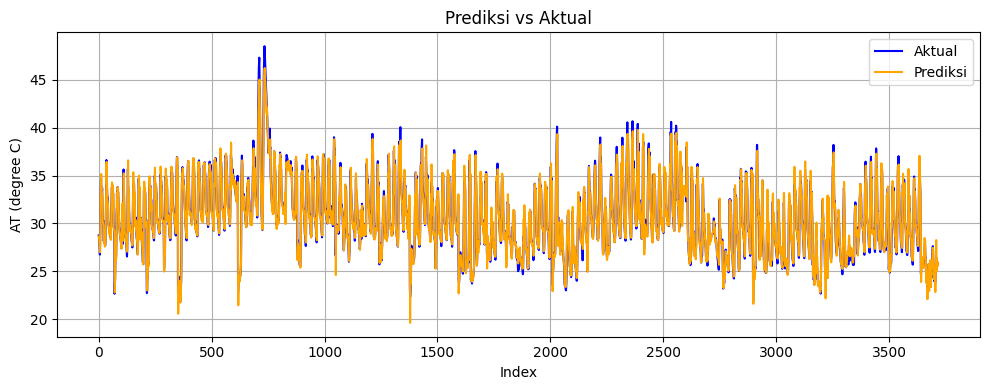

In [ ]:
def plot_actual_vs_predicted(model1, y_actual, y_pred, title="Prediksi vs Aktual"):
    plt.figure(figsize=(10, 4))
    plt.plot(y_actual, label='Aktual', color='blue')
    plt.plot(y_pred, label='Prediksi', color='orange')
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("AT (degree C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_actual_vs_predicted(model1, y_actual, y_pred)

* **Garis biru**: Data suhu aktual.
* **Garis oranye**: Hasil prediksi dari model.



* Secara umum, garis prediksi mengikuti pola garis aktual dengan cukup baik.
* Terdapat beberapa titik atau area di mana garis oranye sedikit menyimpang dari garis biru, namun **perbedaan ini relatif kecil**.

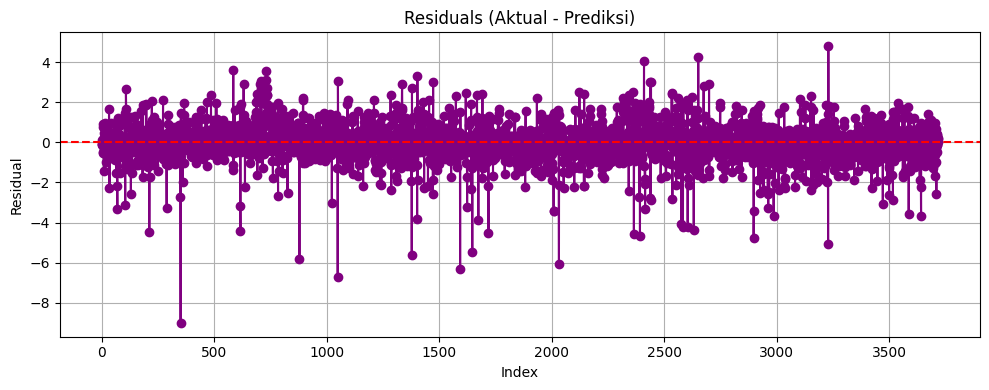

In [ ]:
import matplotlib.pyplot as plt

def plot_residuals(model1, y_actual, y_pred):
    residuals = y_actual - y_pred

    plt.figure(figsize=(10, 4))
    plt.plot(residuals, marker='o', linestyle='-', color='purple')
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals (Aktual - Prediksi)")
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_residuals(model1, y_actual, y_pred)

* Titik-titik ungu mewakili residual (selisih antara nilai aktual dan prediksi).
* Garis merah putus-putus di tengah menandai **residual = 0**, yaitu prediksi sempurna.
* Sebagian besar titik berada **dekat dengan garis 0**, menandakan bahwa prediksi model cukup akurat.



# Evaluasi Keseluruhan

In [ ]:
# Ambil input 5 jam terakhir (harus 3D: (1, sequence_length, fitur))
last_seq = X_test[-1:]

# Prediksi dari model baseline
pred_model_scaled = model.predict(last_seq)
pred_model = scaler.inverse_transform(
    np.repeat(pred_model_scaled, len(all_columns), axis=1)
)[:, at_col_idx][0]

# Prediksi dari model1
pred_model1_scaled = model1.predict(last_seq)
pred_model1 = scaler.inverse_transform(
    np.repeat(pred_model1_scaled, len(all_columns), axis=1)
)[:, at_col_idx][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [ ]:
# Ambil nilai aktual dari y_test (terakhir)
y_true_scaled = y_test[-1].reshape(-1, 1)
y_true_full = np.repeat(y_true_scaled, len(all_columns), axis=1)
y_true_value = scaler.inverse_transform(y_true_full)[:, at_col_idx][0]

In [ ]:
print("📈 Statistik Prediksi 1 Jam ke Depan")
print(f"✅ Nilai Aktual (y_true):         {y_true_value:.2f} °C")
print(f"🔵 Prediksi dari model (baseline): {pred_model:.2f} °C")
print(f"🟠 Prediksi dari model1 (dropout): {pred_model1:.2f} °C")
print(f"📉 Residual model baseline (Aktual - Pred): {y_true_value - pred_model:.2f}")
print(f"📉 Residual model modification (Aktual - Pred): {y_true_value - pred_model1:.2f}")

📈 Statistik Prediksi 1 Jam ke Depan
✅ Nilai Aktual (y_true):         25.75 °C
🔵 Prediksi dari model (baseline): 25.71 °C
🟠 Prediksi dari model1 (dropout): 25.07 °C
📉 Residual model (Aktual - Pred): 0.04
📉 Residual model1 (Aktual - Pred): 0.68


###  **Nilai Aktual (y\_true):** 25.75 °C

###  **Model Baseline**

* **Prediksi:** 25.71 °C
* **Residual:** 0.04 °C
*  *Sangat akurat* — prediksi hampir sama dengan nilai aktual.

###  **Model1 (dengan Dropout)**

* **Prediksi:** 25.07 °C
* **Residual:** 0.68 °C
*  *Kurang akurat dibanding baseline* — prediksi lebih rendah dari nilai aktual.

###  **Kesimpulan**:

Model baseline memberikan hasil prediksi yang **lebih mendekati nilai aktual**, dengan **residual yang sangat kecil**, menunjukkan kinerja yang lebih stabil dan akurat dibandingkan Model1.